# DSC540 Project 1

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

In [1]:
import sklearn
sklearn.__version__

'1.1.3'

In [2]:
#Packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### These are the packages I used

In [5]:
#Installing the Packages and running it

In [6]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

# DSC540 Project 1

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You can use more than one cell, if you'd like.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
       

Good Luck!

### Goutham Selvakumar

**Honor Pledge:**  
I pledge on my honor that I, **Goutham Selvakumar**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 


## The Data

In this project, we will be working with the **Breast Cancer Wisconsin dataset**, which
contains 569 examples of malignant and benign tumor cells.  
The Breast Cancer Wisconsin dataset can be found in the UCI
Machine Learning Repository, and more detailed information about this dataset can
be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).  
The first two columns in the dataset store the unique ID numbers of the examples and the corresponding
diagnoses (M = malignant, B = benign), respectively.   
Columns 3-32 contain 30 real-valued features that have been computed from digitized images of the cell
nuclei, which can be used to build a model to predict whether a tumor is benign
or malignant.  

**Variable Information:**

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)
    
    
The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

### Load the dataset

- Since the dataset at the UCI repository does not have headers, we will read the data from the hard drive which I have modified.
- Last column is the target column.
- The ID column is already dropped.

In [8]:
#Reading the WDBC dataset
df = pd.read_csv('C:/Users/admin/Downloads/wdbc.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
df.columns = ['id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [10]:
df.head()

,id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
#Dropping the ID, and Diagnosis columns
X = df.drop(['id', 'diagnosis'], axis=1)

In [12]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The target vector is `y`.

In [13]:
y = df.diagnosis
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

### Question 1 [10 points]
How many people have cancer?

> Hint: Should be less than 300!

In [14]:
#Printing the people that have cancer (212)
print((y=='M').sum())

212


212 people have malignant cancer.


Check the feature set `X` and investigate the column types. Is there any categorical data? Any missing values? 
How many observations? How many variables are there in the feature set (`X`)?

In [15]:
#features that are included are given by the info function
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

- No missing values. 
- No categorical variables. 
- 569 observations, 30 columns.

### Question 2 [5 points]
- Check the statistical summary of numeric features. Do the variables have values close to each other, or is there large differences?
- Among the `mean` (the first 10) features, which one has the minimum 25% percentile value? 
- Which `mean` variable (the first 10 features) has the largest mean value?

In [16]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [17]:
#Finding the minimum mean value
print(X.min())

mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [18]:
#Finding the maximum mean value
print(X.max())

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.16340
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09744
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

- There are large differences between the variables.
- `mean area` has the largest mean value
- `mean concave points` has the minimum 25% percentile value.

### Question 3 [5 points]
These features are all engineered from images. I suspect there is some variables with large correlation. Are there largely correlated variables? Why do you think they are largely correlated? Comment on a few.
- Calculate correlation.
- Create a correlation heatmap.
- Comment on largely correlated variables.

In [19]:
#Calculating the correlation 
corr_var = X.corr()
corr_var

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


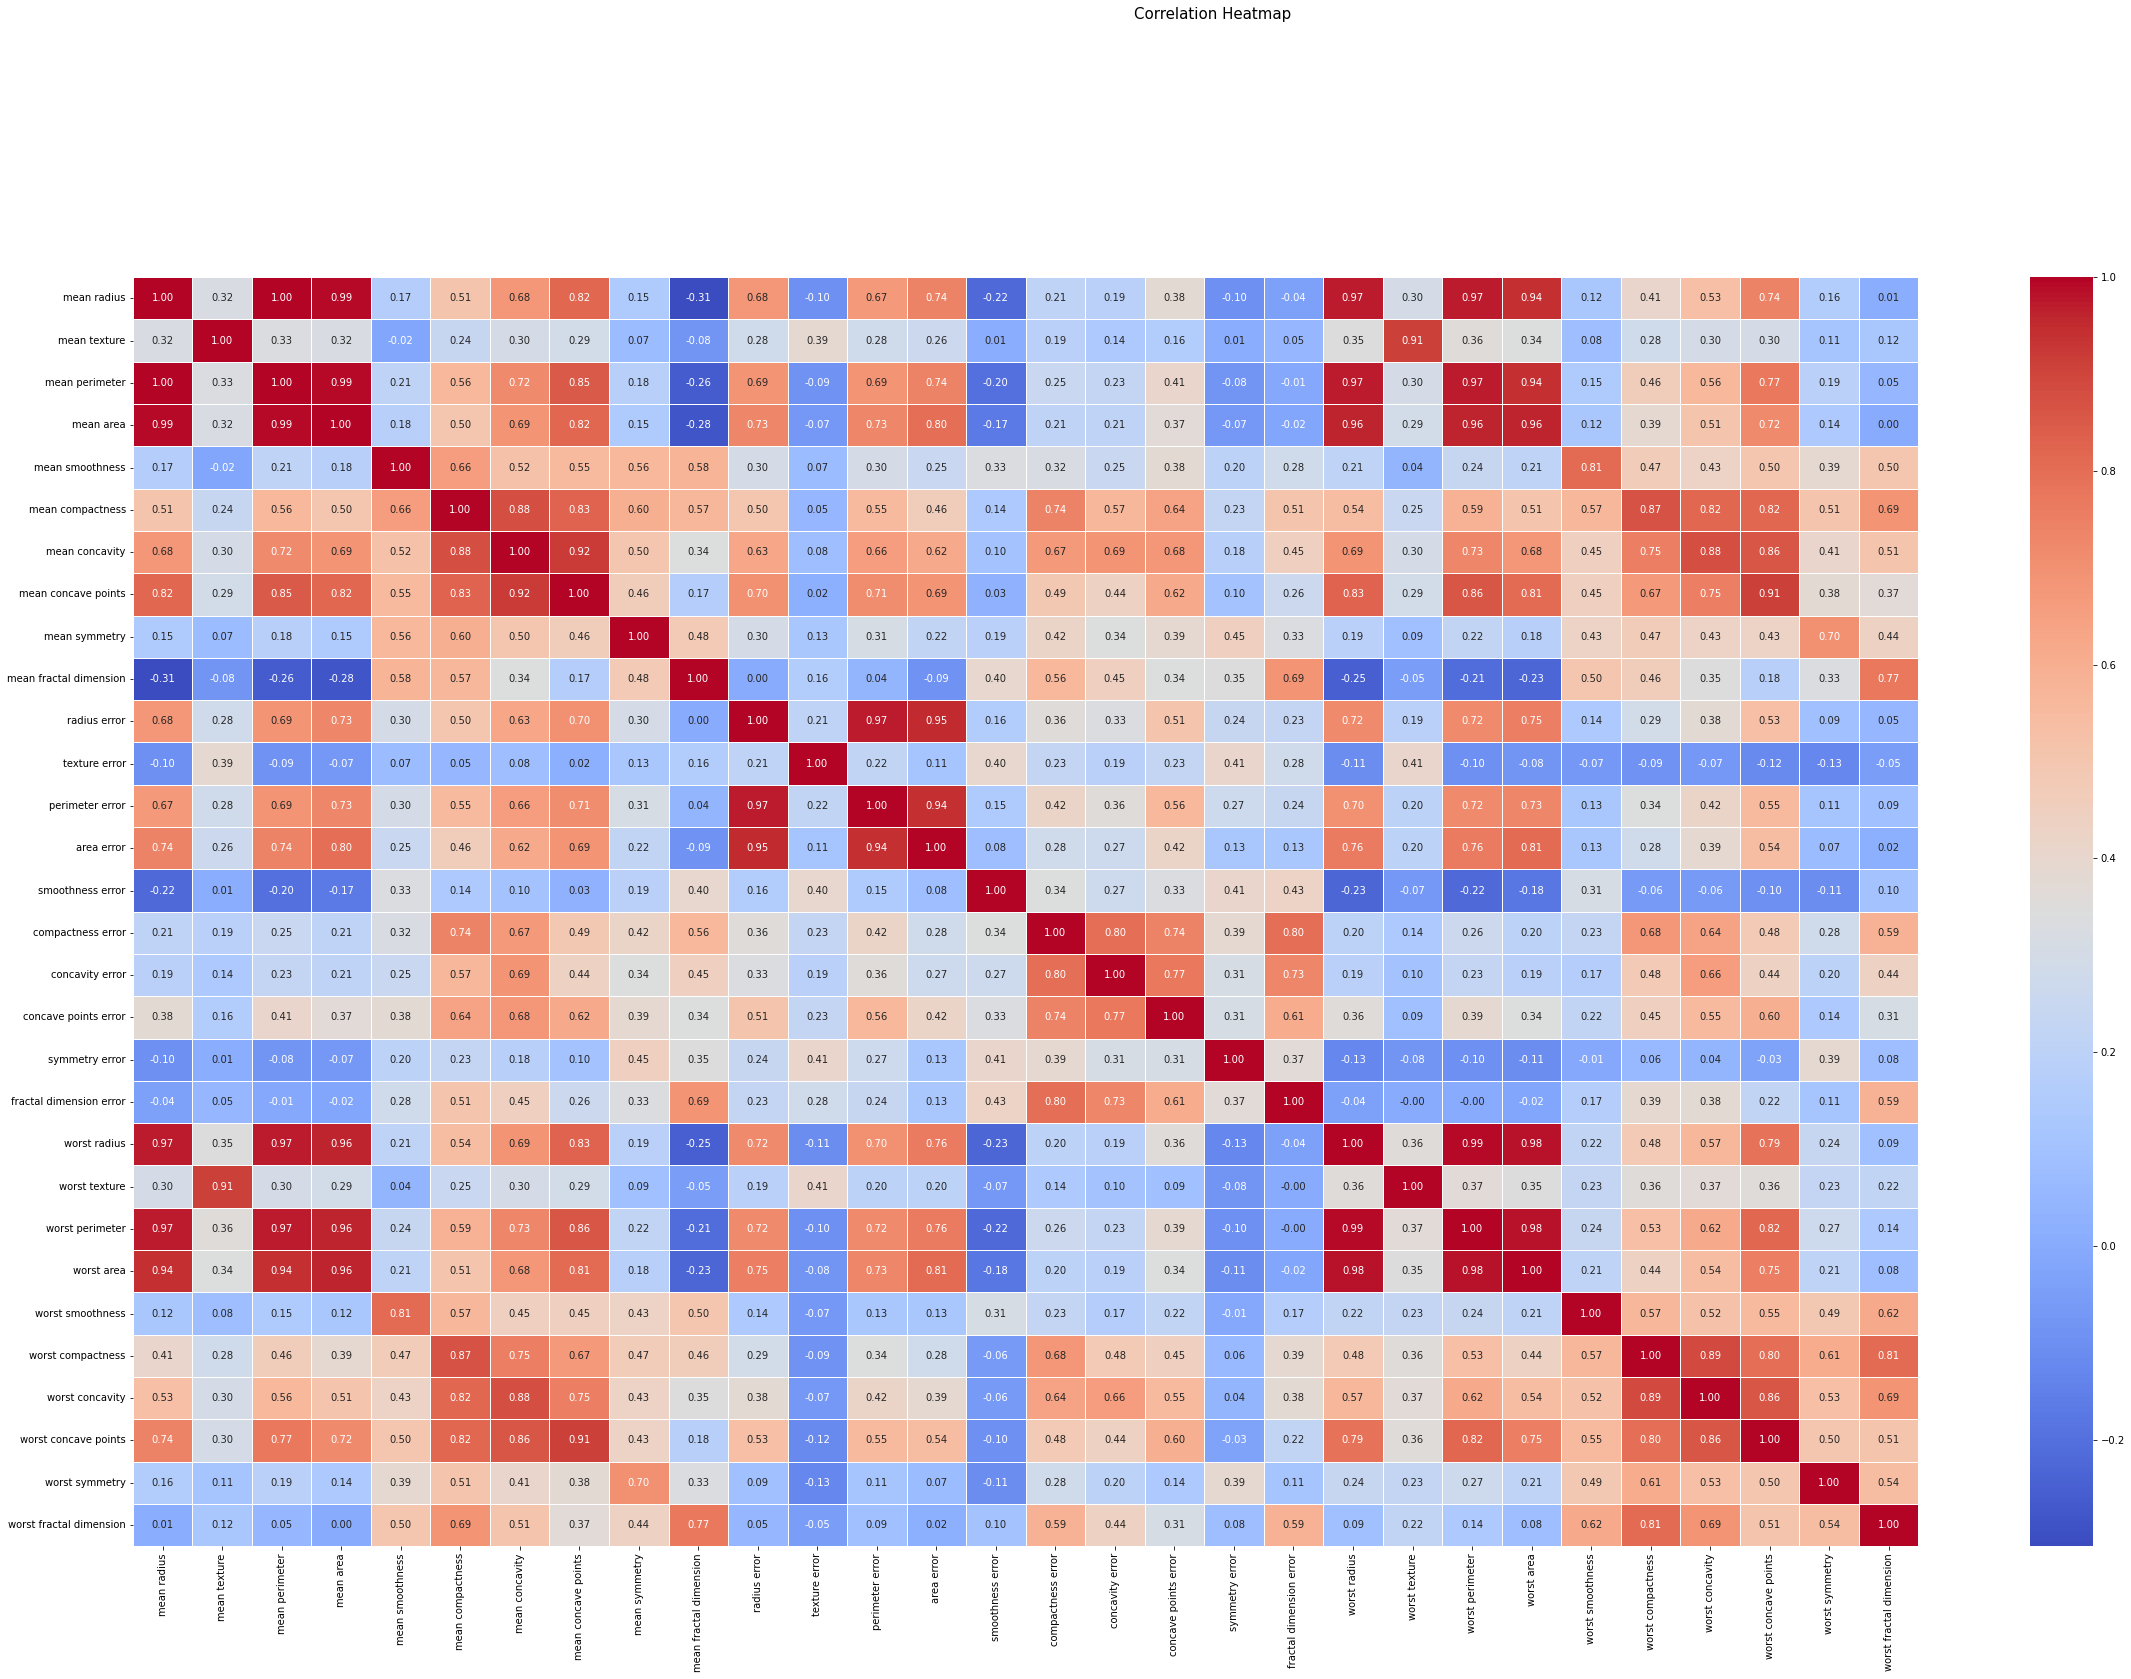

In [23]:
#Correlation heatmap
f, ax = plt.subplots(figsize=(40, 25))
heat_map = sns.heatmap(round(corr_var,2), annot = True, ax = ax, 
                       cmap = "coolwarm", fmt = '.2f', linewidth = 0.5)
f.subplots_adjust(top = 0.83)
t = f.suptitle('Correlation Heatmap', fontsize = 15)

The highly and most correlated mean radius is correlated with the mean perimeter, mean area, worst radius, worst perimeter, worst area variables which are represented by the range of 0.94 - 1.00. Furthermore, the radius error is also highly correlated with the perimeter error, and area error present in the heat map.

The mean compactness, mean concavity, radius error, perimeter error, and area error are moderately correlated with the mean radius in the heat map. The mean radius is slightly and has low correlation with that of the mean smoothness, compactness error, mean symmetry, worst smoothness, worst smoothness, worst symmetry, worst fractal dimension that all has values of the correlation very low in the heat map that can be represented in the blue color.

The one that are represented in the dark blue color from the heatmap has values of the correlation in the negative value, the mean radius with that of the mean fractal dimension, texture error, smoothness error, symmetry errors.




### Train - Test split 
- Use sklearn's `tran_test_split()` function to create the split.
- Use `random_state = 55` to create consistent and repeatable train-test splits.

- What is the proportion of cancer classes in train and test sets after splitting? Are they equal or very close to each other?
- What is the importance of stratified sampling?

In [29]:
#Importing the packages
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [30]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int32

In [31]:
y = lb.fit_transform(y).ravel()

In [32]:
y = pd.Series(y)

In [33]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int32

In [34]:
# split the datasets into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)

In [35]:
y_train.value_counts(normalize=True)

0    0.626761
1    0.373239
dtype: float64

In [36]:
y_test.value_counts(normalize=True)

0    0.629371
1    0.370629
dtype: float64

Stratified random sampling ensures that the splits keep their proportion of targets values. This is important to stay consistent with the data collected.

Now let's train a logistic regression model on the breast cancer data. This is a binary classification problem.

### Question 4 [10 points]

- Initiate the logistic regression classifier from the sklearn library as shown below.
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or use the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - False Positive Rate
     - F1 Score

In [37]:
#Importing the Packages
from sklearn.linear_model import LogisticRegression

In [38]:
clf = LogisticRegression(max_iter = 10000, C=0.1)

In [39]:
#Fitting the model
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000)

In [40]:
#Calculating the accuracy score for the training and testing
#For training
pred = clf.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred)

0.9413145539906104

In [41]:
#Checking the shape for Y_train and Y_test
print(y_train.shape)
print(y_test.shape)

(426,)
(143,)


In [42]:
#Checking the shape for X_train and X_test
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [43]:
#For testing
pred = clf.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred)

0.986013986013986

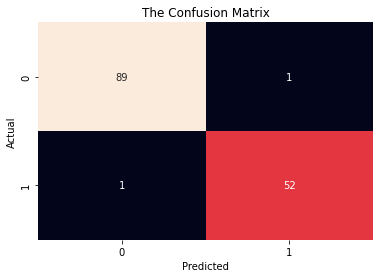

In [44]:
#Confusion matrix is created
conf_matrix = pd.crosstab(index = np.ravel(y_test), columns = pred.ravel(), rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(conf_matrix, annot = True, square = False, fmt = '', cbar = False)
#Title
plt.title("The Confusion Matrix")
#Plotting the confusion matrix
plt.show()

In [45]:
#Calculating the Sensivity, Specificity, Precision, FPR, and F1-score
class_report = metrics.classification_report(y_true = y_test, y_pred = pred, output_dict=True)
#Sensitivity
print("Sensitivity %.4f"%(class_report['1']['recall']))
#Specificity
print("Specificity %.4f"%(class_report['0']['recall']))
#Precision
print("Precision %.4f"%(class_report['1']['precision']))
#FPR
print("False Positive Rate %.4f"%(1-class_report['0']['recall']))
#F1-score
print("F1-score %.4f"%(class_report['1']['f1-score']))

Sensitivity 0.9811
Specificity 0.9889
Precision 0.9811
False Positive Rate 0.0111
F1-score 0.9811


In [46]:
#Metric Scores
print(metrics.classification_report(y_true = y_test, y_pred = pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



Training Accuracy is 94% and Testing Accuracy is 98%

The Sensitivity has 98%, Specificity has 98% from the classification report. Furthermore, the metrics have been calculated from which we can notice that the class 0 is performing slightly better than the class 1 with the 99% and 98% respectively.

### Question 5 [10 points]

- Initiate the k-nearest neighbours classifier from the sklearn library with n_neighbors=1. Keep the remaining parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [38]:
#Importing Package
from sklearn.neighbors import KNeighborsClassifier

In [47]:
clf = KNeighborsClassifier(n_neighbors=1)

In [48]:
#Fitting the model
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
#Calculating the accuracy score for the training and testing
#For training
pred = clf.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred)

1.0

In [50]:
#For testing
pred = clf.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred)

0.9440559440559441

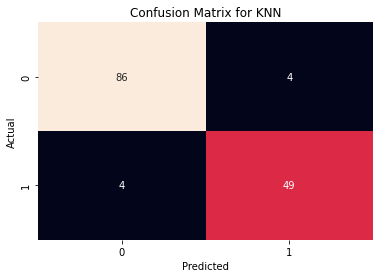

In [51]:
#Confusion Metrics
conf_matrix =  pd.crosstab(index = np.ravel(y_test), columns = pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, square=False, fmt='', cbar=False)
#Title
plt.title("Confusion Matrix for KNN")
#Plotting the CM for KNN
plt.show()

In [52]:
#Calculating the Sensivity, Specificity, Precision, FPR, and F1-score
class_report= metrics.classification_report(y_true = y_test, y_pred = pred, output_dict=True)
#Sensitivity
print("Sensitivity %.4f"%(class_report['1']['recall']))
#Specificity
print("Specificity %.4f"%(class_report['0']['recall']))
#Precision
print("Precision %.4f"%(class_report['1']['precision']))
#FPR
print("False Positive Rate %.4f"%(1-class_report['0']['recall']))
#F1-score
print("F1-score %.4f"%(class_report['1']['f1-score']))

Sensitivity 0.9245
Specificity 0.9556
Precision 0.9245
False Positive Rate 0.0444
F1-score 0.9245


In [53]:
#Metric Scores
print(metrics.classification_report(y_true = y_test, y_pred = pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



The accuracy score of the training and testing are 100% and 94% respectively.

From the metrics score we can further see the scores being class 0 higher than that of the class 1 with the 92% for sensitivity and 96% for the specificity.

### Question 6 [10 points]

In logistic regression keeping the other parameters constant try these values for C: `C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]`.  
C is the inverse of the regularization parameter $\lambda$. As C increases, the penalty decreases.
- Create a loop and fit the models using each C value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Create the validation curve based on each C value and the corresponding train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [54]:
#Creating the values for C
C_val = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
acc_train = []
acc_test = []
for C in C_val:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    # Code here
    clf.fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    acc_train.append(metrics.accuracy_score(y_true = y_train, y_pred = pred_train))
    pred_test = clf.predict(X_test)
    acc_test.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_test))

In [55]:
#Accuracy for training and testing
#For training
acc_train

[0.9248826291079812,
 0.931924882629108,
 0.9413145539906104,
 0.9342723004694836,
 0.9389671361502347,
 0.9413145539906104,
 0.9413145539906104,
 0.9460093896713615,
 0.9460093896713615,
 0.9507042253521126,
 0.9647887323943662,
 0.971830985915493,
 0.9812206572769953,
 0.9859154929577465,
 0.9859154929577465,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221]

In [56]:
#For testing
acc_test

[0.9370629370629371,
 0.958041958041958,
 0.9790209790209791,
 0.972027972027972,
 0.972027972027972,
 0.9790209790209791,
 0.986013986013986,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.986013986013986,
 0.986013986013986,
 0.993006993006993,
 0.986013986013986,
 0.986013986013986,
 0.986013986013986,
 0.9790209790209791,
 0.972027972027972,
 0.972027972027972]

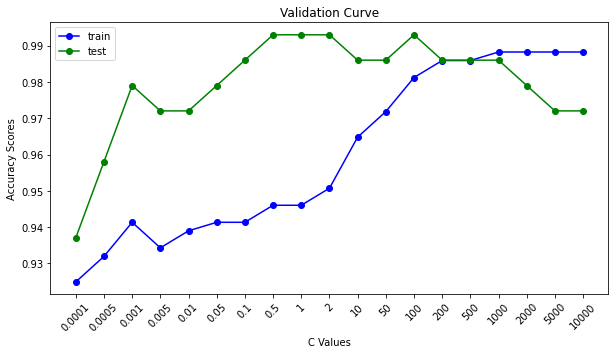

In [57]:
#Validation Curve 
plt.figure(figsize=(10,5))
#Title
plt.title("Validation Curve")
#Accuracy Training
plt.plot(acc_train, 'bo-', label = 'train')
#Accuracy Testing
plt.plot(acc_test,'go-', label = 'test')
plt.xticks(np.arange(len(C_val)), C_val, rotation =45)
plt.xlabel('C Values')
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

### Question 7 [10 points]

In K Nearest Neighbors keeping the other parameters constant try these values for K (n_neighbors): `K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49]`.  
- Create a loop and fit the models using each K value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Create the validation curve based on each K value and the corresponding train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [58]:
#Creating the K_neighbors values
K_val = [1,3,5,7,9,15,19,25,29,35,39,45,49]
#Training
acc_train = []
#Testing
acc_test = []
for K in K_val:
    clf = KNeighborsClassifier(n_neighbors=K)
#Fitting the model
    clf.fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    acc_train.append(metrics.accuracy_score(y_true = y_train, y_pred = pred_train))
    pred_test = clf.predict(X_test)
    acc_test.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_test))

In [59]:
#Getting the accuracy for testing and training
#For Training
acc_train

[1.0,
 0.9483568075117371,
 0.9460093896713615,
 0.9389671361502347,
 0.931924882629108,
 0.9248826291079812,
 0.9272300469483568,
 0.9248826291079812,
 0.9225352112676056,
 0.9225352112676056,
 0.9225352112676056,
 0.9131455399061033,
 0.9084507042253521]

In [60]:
#For testing
acc_test

[0.9440559440559441,
 0.965034965034965,
 0.9370629370629371,
 0.9440559440559441,
 0.9370629370629371,
 0.9440559440559441,
 0.9440559440559441,
 0.9370629370629371,
 0.9370629370629371,
 0.9370629370629371,
 0.9300699300699301,
 0.9230769230769231,
 0.9300699300699301]

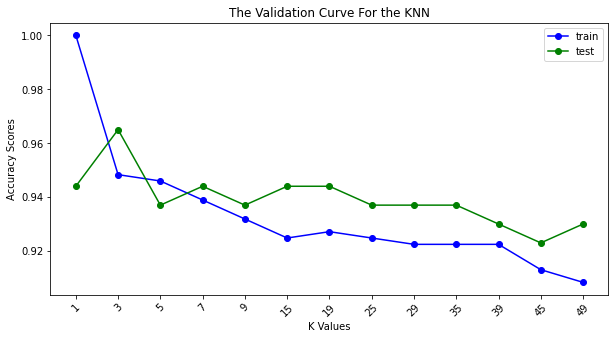

In [61]:
#Validation Curve 
plt.figure(figsize=(10,5))
#Title
plt.title("The Validation Curve For the KNN")
#Accuracy Train
plt.plot(acc_train, 'bo-', label = 'train')
#Accuracy Test
plt.plot(acc_test,'go-', label = 'test')
plt.xticks(np.arange(len(K_val)), K_val, rotation = 45)
plt.xlabel('K Values')
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

### Question 8 [10 points]

- The validation curve for logistic regression seems a bit weird. That might have to do with the fact that the data is not normalized.
- Apply standardization to the data.
- In logistic regression keeping the other parameters constant try these values for C: `C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]`.  
- Plot validation curves. What do you see? 
- Which value would you choose for C in logistic regression?

In [62]:
#Importing Package
from sklearn import preprocessing

In [63]:
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [64]:
#Creating the values for C
C_val = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
#Training
acc_train_ss = []
#Testing
acc_test_ss = []
for C in C_val:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
#Fitting the model
    clf.fit(X_train_ss, y_train)
    pred_train_ss = clf.predict(X_train_ss)
    acc_train_ss.append(metrics.accuracy_score(y_true = y_train, y_pred = pred_train_ss))
    pred_test_ss = clf.predict(X_test_ss)
    acc_test_ss.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_test_ss))

In [65]:
#Getting the accuracy for training and testing
#For training
acc_train_ss

[0.6455399061032864,
 0.8356807511737089,
 0.8849765258215962,
 0.9460093896713615,
 0.9483568075117371,
 0.9788732394366197,
 0.9835680751173709,
 0.9906103286384976,
 0.9906103286384976,
 0.9929577464788732,
 0.9929577464788732,
 0.9929577464788732,
 0.9929577464788732,
 0.9953051643192489,
 0.9976525821596244,
 0.9976525821596244,
 1.0,
 1.0,
 1.0]

In [66]:
#For testing
acc_test_ss

[0.6363636363636364,
 0.8671328671328671,
 0.9300699300699301,
 0.965034965034965,
 0.965034965034965,
 0.9790209790209791,
 0.986013986013986,
 0.986013986013986,
 0.9790209790209791,
 0.9790209790209791,
 0.9790209790209791,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.965034965034965,
 0.965034965034965,
 0.965034965034965,
 0.965034965034965]

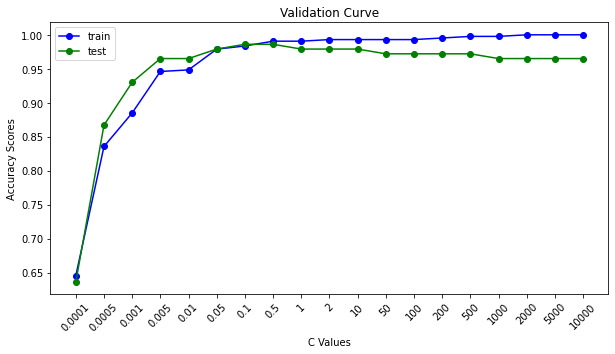

In [67]:
#Plotting the validation curve
plt.figure(figsize=(10,5))
plt.title("Validation Curve")
#Accuracy Train
plt.plot(acc_train_ss, 'bo-', label = 'train')
#Accuracy Test
plt.plot(acc_test_ss,'go-', label = 'test')
plt.xticks(np.arange(len(C_val)), C_val, rotation = 45)
plt.xlabel('C Values')
plt.ylabel('Accuracy Scores')
plt.legend()
#Plot
plt.show()

The model is underfitting, when C<1 is present in the Validation Curve and C>1 represents that the model is underfitting. C=1 value has been choosed in which we can see the accuracy being the highest of 96%.

### Question 9 [10 points]

- After choosing your best C value, let's check the learning curve.
- Create a logistic regression model of your chosen C value.
- Starting from 10 data points in the training set, increase your training set size by 1 points in each iteration, fit the model, get the accuracy scores for both the current training and test sets.
- Increase the training set size consecutively. Do not randomly select data points. (`X_train_ss[0:N,:] where N = {1,2,3,...,len(X_train_ss)}`)
- Plot the learning curve. What do you see? Comment on your finding. 

In [68]:
X_train_ss.shape

(426, 30)

In [69]:
# list(range(1, X_train_ss.shape[0]))
n=1
X_train_ss[0:n,:]

array([[-0.50323613,  1.73953408, -0.44053352, -0.49664617,  0.53358854,
         0.59839524,  0.25384105, -0.07259947,  0.47589812,  0.94655516,
         0.01943197,  1.10918571, -0.08331186, -0.11344568,  0.73341644,
         0.68332997,  0.17965816,  0.26900086, -0.2116796 ,  0.6599449 ,
        -0.12918496,  2.17946516, -0.1622508 , -0.19511526,  1.9967161 ,
         1.31027091,  0.79584853,  0.47330699,  0.45100311,  1.90561739]])

In [70]:
y_train

193    1
543    0
255    1
142    0
330    1
      ..
167    1
73     1
366    1
245    0
239    1
Length: 426, dtype: int32

In [91]:
#Accuracy for the training and the testing
#For training
#For testing
N_val = np.arange(10,len(X_train_ss)+1,1).tolist()
acc_train = []
acc_test = []
for N in N_val:
    clf = LogisticRegression(max_iter = 100, solver='lbfgs', penalty='l2', C=0.5, verbose=0)
#Fitting the model
    clf.fit(X_train_ss[0:N,:], y_train[0:N])
    pred_trn = clf.predict(X_train_ss[0:N,:])
    acc_train.append(metrics.accuracy_score(y_true = y_train[0:N], y_pred = pred_trn))
    pred_tst = clf.predict(X_test_ss)
    acc_test.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_tst))

C:\Users\admin\AppData\Local\Temp\ipykernel_13664\1887574789.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  clf.fit(X_train_ss[0:N,:], y_train[0:N])
C:\Users\admin\AppData\Local\Temp\ipykernel_13664\1887574789.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  acc_train.append(metrics.accuracy_score(y_true = y_train[0:N], y_pred = pred_trn))
C:\Users\admin\AppData\Local\Temp\ipykernel_13664\1887574789.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dty

In [73]:
print(N_val)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,

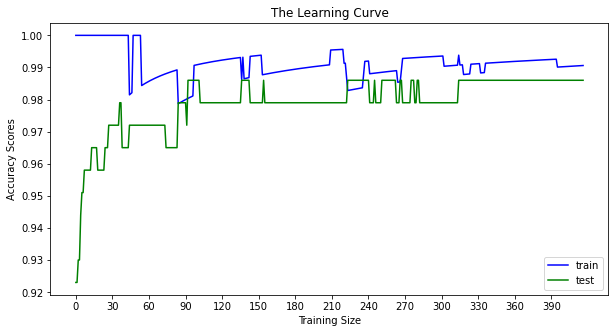

In [74]:
plt.figure(figsize=(10,5))
plt.title("The Learning Curve")
#Plotting for the training and testing
plt.plot(acc_train, 'b-', label = 'train')
plt.plot(acc_test,'g-', label = 'test')
plt.xticks(np.arange(0, len(N_val), step=30))
#Defining the labels for X and Y
plt.xlabel('Training Size')
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

The training size accuracy scores changes rapidly. 100, 150, 210, and 330 are the optimal size of the training. 

### Question 10 [20 points]
- Think of other ways of improving the accuracy and list at least two possibilities.
- Implement both the methods you proposed. 
- Is the model accuracy increasing? Why do you think this might have helped?
- If both of them did not impove, can you think of anything else? (Optional to apply)

1. Using the Stratified Cross-Validation Technique

In order to avoid the overfitting present in the original training set we split it so that in each training the accuracy can be evaluated correctly.
Only for the better accuracy we use this Stratified Cross-Validation on the training set so that all the labels are represented correctly. Applying it in the Question 8 in order to find the best parameter for log regression.

In [75]:
#Initializing the 5-fold stratified cross-validation and X first is standardized
strat_s = preprocessing.StandardScaler()
X_strat_s = strat_s.fit_transform(X_train).tolist()
sk_fold = StratifiedKFold(n_splits=5, random_state=None)
sk_fold.get_n_splits(X_strat_s, y_train)

5

In [76]:
#5 fold SCV with the hyper parameter tuning
C_val = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 
         50, 100, 200, 500, 1000, 2000, 5000, 10000]
acc_valid = []
#Fitting the C value in the logistic regression
for C in C_val:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    score_valid= cross_val_score(clf,X_strat_s, y_train, scoring = "accuracy", cv =sk_fold )
    acc_valid.append(score_valid.mean())

In [77]:
#Checking the accuracy
acc_valid

[0.6291108071135431,
 0.8050889192886457,
 0.8614774281805746,
 0.9341723666210671,
 0.9412311901504788,
 0.9717920656634748,
 0.976497948016416,
 0.9835567715458277,
 0.9718194254445965,
 0.9671135430916553,
 0.9577291381668948,
 0.9483447332421342,
 0.9460191518467853,
 0.9460191518467853,
 0.9460465116279071,
 0.9460465116279071,
 0.9460465116279071,
 0.9460465116279071,
 0.9460465116279071]

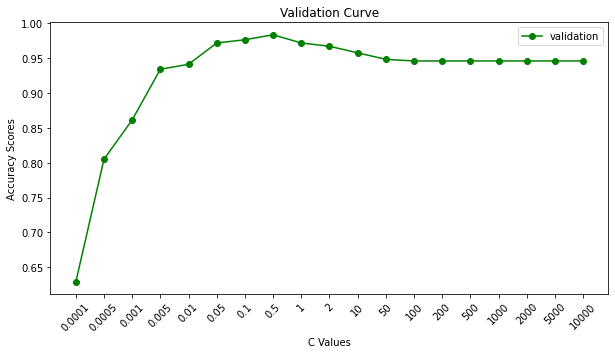

In [78]:
#Plotting the validation curve with 5 fold 
plt.figure(figsize=(10,5))
#Title
plt.title("Validation Curve")
plt.plot(acc_valid, 'go-',label = 'validation')
plt.xticks(np.arange(len(C_val)), C_val, rotation = 45)
plt.xlabel('C Values')
plt.ylabel('Accuracy Scores')
plt.legend()
#Plot
plt.show()

In [79]:
#C=1
s_s = preprocessing.StandardScaler()
#Fitting for the training
X_train_ss = s_s.fit_transform(X_train)
#Fitting for the testing
X_test_ss = s_s.transform(X_test)
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=1)
#Fitting both the training and the testing
clf.fit(X_train_ss, y_train)
#Predicting for the Training
pred = clf.predict(X_train_ss)
print("Accuracy of Train set: " ,metrics.accuracy_score(y_true = y_train, y_pred = pred))
#Predicting for the Testing
pred = clf.predict(X_test_ss)
print("Accuracy of Test set: " , metrics.accuracy_score(y_true = y_test, y_pred = pred))

Accuracy of Train set:  0.9906103286384976
Accuracy of Test set:  0.9790209790209791


The stratified cross validation is more reliable from the training accuracy rate and furthermore the new model of this stratified cross validation gives us with better accuracy and parameter tuning.

2. Selecting the best features that can fit the model
The important features are selected from the target class in order to avoid the overfitting and improve the model accuracy. ExtraTreesClassifier is used in order to use the important value of features, so, the higher the value the more it is considered to be important. 



In [80]:
model_tree = ExtraTreesClassifier(n_estimators=100)
model_tree.fit(X, y)
print(model_tree.feature_importances_)

[0.05513656 0.02398665 0.0788352  0.07217099 0.01050534 0.01930288
 0.04733173 0.07427741 0.00808877 0.00613678 0.02708532 0.00735432
 0.01605156 0.02780392 0.00544547 0.00851829 0.00919049 0.01367617
 0.00514151 0.00605018 0.08107541 0.02413465 0.0826627  0.08065996
 0.02219675 0.03077555 0.05299761 0.07570494 0.01835259 0.00935031]


In [81]:
cols = [8,9,11,14,15,16,19]
new_X = X_train.drop(columns=X_train.columns[cols])

In [82]:
# Standarized data and initialized Stratified 5 folds
s_s = preprocessing.StandardScaler()
X_ss = ss.fit_transform(new_X).tolist()
skf = StratifiedKFold(n_splits=5, random_state=None)
skf.get_n_splits(X_ss, y_train)

5

In [83]:
#Fitting the data with 5 folds for C
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 
          100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_ss = []
for C in C_list:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    score_train= cross_val_score(clf,X_ss, y_train, scoring = "accuracy", cv =skf )
    accuracy_ss.append(score_train.mean())

In [84]:
accuracy_ss

[0.6291108071135431,
 0.8074418604651162,
 0.8685088919288646,
 0.9294938440492476,
 0.9388782489740082,
 0.9647606019151848,
 0.9647879616963065,
 0.9741723666210671,
 0.9765253077975377,
 0.9741723666210671,
 0.962407660738714,
 0.9601094391244871,
 0.955403556771546,
 0.9577564979480165,
 0.9530232558139536,
 0.9506703146374831,
 0.9483173734610124,
 0.9483173734610124,
 0.9483173734610124]

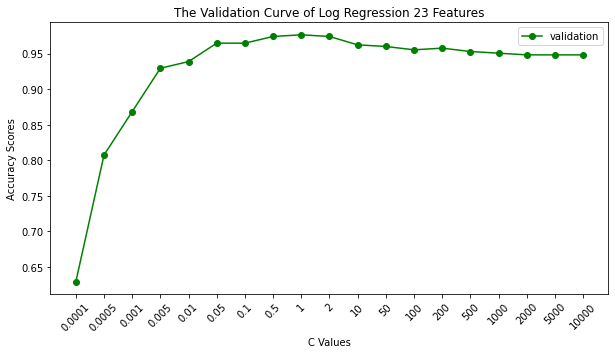

In [85]:
plt.figure(figsize=(10,5))
plt.title("The Validation Curve of Log Regression 23 Features")
plt.plot(accuracy_ss, 'go-' ,label = 'validation')
plt.xticks(np.arange(len(C_list)), C_list, rotation = 45)
plt.xlabel('C Values')
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

In [86]:
cols = [8,9,11,14,15,16,19]
new_X = X_train.drop(columns=X_train.columns[cols])
new_X_test = X_test.drop(columns=X_train.columns[cols])
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(new_X)
X_test_ss = ss.transform(new_X_test)
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.5)
clf.fit(X_train_ss, y_train)
pred = clf.predict(X_train_ss)
print("Accuracy of Train set: " ,metrics.accuracy_score(y_true = y_train, y_pred = pred))
pred = clf.predict(X_test_ss)
print("Accuracy of Test set: " , metrics.accuracy_score(y_true = y_test, y_pred = pred))

Accuracy of Train set:  0.9906103286384976
Accuracy of Test set:  0.9790209790209791


The Stratified Cross Validation and the Feature Selection is used in order to improve the accuracy of the model that leads to eliminate the overfitting.
